In [45]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, cohen_kappa_score, confusion_matrix, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import RocCurveDisplay, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix




In [17]:
def load_dataset(path):
    data = pd.read_csv(path, sep=',');
    x = data.iloc[:, 1:]; #features
    y = data.iloc[:, 0]; #classes
    return x, y;

def get_metrics(model, x_train, x_test, y_train, y_test):
    model.fit(x_train, y_train);
    y_pred = model.predict(x_test);
    y_pred_prob = model.predict_proba(x_test);

    accuracy = accuracy_score(y_test, y_pred);
    kappa = cohen_kappa_score(y_test, y_pred);
    conf_matrix = confusion_matrix(y_test, y_pred);

    # For multiclass, specify 'average' parameter
    precision = precision_score(y_test, y_pred, average='weighted');  # 'weighted'
    recall = recall_score(y_test, y_pred, average='weighted');        # 'weighted'
    f1 = f1_score(y_test, y_pred, average='weighted');                # 'weighted'

    # One-vs-Rest approach for multiclass ROC and AUC
    lb = LabelBinarizer();
    y_test_bin = lb.fit_transform(y_test);
    fpr, tpr, thresholds = {}, {}, {};
    auc = {};
    
    for i in range(y_test_bin.shape[1]):  # Iterate over each class
        fpr[i], tpr[i], thresholds[i] = roc_curve(y_test_bin[:, i], y_pred_prob[:, i]);
        auc[i] = roc_auc_score(y_test_bin[:, i], y_pred_prob[:, i]);

    return accuracy, kappa, conf_matrix, precision, recall, f1, fpr, tpr, thresholds, auc;



def cross_validated_grid_search(model,x,y,param_grid):
    all_pred = [];
    all_true = [];

    np_x = np.array(x);
    np_y = np.array(y);
    kf = StratifiedKFold(4);

    for train_index, test_index in kf.split(x,y):
        x_train = np_x[train_index];
        y_train = np_y[train_index];
        x_test = np_x[test_index];
        y_test = np_y[test_index];
        all_grid = GridSearchCV(model, 
                                    param_grid, 
                                    cv=StratifiedKFold(
                                        n_splits=4),
                                    scoring='accuracy',
                                    refit='accuracy');

        all_grid.fit(x_train,y_train);
        all_pred.extend(all_grid.predict(x_test));
        all_true.extend(y_test);
    return all_pred, all_true;




In [ ]:

# data_x, data_y = load_dataset('Data/Dig-MNIST.csv');
# data_x_test, data_y_test = load_dataset('Data/test.csv');
# data_x_train, data_y_train = load_dataset('Data/train.csv');



# # Combine data and labels
# data_x_combined = pd.concat([data_x_train, data_x_test], axis=0);
# data_y_combined = pd.concat([data_y_train, data_y_test], axis=0);

# # Shuffle the combined dataset to mix the training and test data
# data_x_combined, data_y_combined = shuffle(data_x_combined, data_y_combined, random_state=42);
# data_x_train, data_x_test, data_y_train, data_y_test = train_test_split(data_x_combined, data_y_combined, test_size=0.3);

# model = RandomForestClassifier();
# results = get_metrics(model, data_x_train, data_x_test, data_y_train, data_y_test);
# print(results);


# common_classes = set(data_y_train).intersection(set(data_y_test))

# # Filter training and test sets to keep only the common classes
# train_filter = data_y_train.isin(common_classes);
# test_filter = data_y_test.isin(common_classes);

# data_x_train = data_x_train[train_filter];
# data_y_train = data_y_train[train_filter];
# data_x_test = data_x_test[test_filter];
# data_y_test = data_y_test[test_filter];


# model = RandomForestClassifier();

# results = get_metrics(model, data_x_train, data_x_test, data_y_train, data_y_test)

# # Convert both to a list before concatenation
# for metric, value in zip(
#     ["Accuracy", "Kappa", "Confusion Matrix", "Precision", "Recall", "F1-Score", "AUC"],
#     list(results[:7]) + [results[-1]],  # Convert tuple to list before concatenating
# ):
#     print(f"{metric}: {value}")
#     print("\n");

In [ ]:
data_x, data_y = load_dataset('Data/Dig-MNIST.csv');
data_x_test, data_y_test = load_dataset('Data/test.csv');
data_x_train, data_y_train = load_dataset('Data/train.csv');

data_x_combined = pd.concat([data_x_train, data_x], axis=0);
data_y_combined = pd.concat([data_y_train, data_y], axis=0);

# Shuffle the combined dataset to mix the training and test data
data_x_combined, data_y_combined = shuffle(data_x_combined, data_y_combined, random_state=42);
data_x_train, data_x_test, data_y_train, data_y_test = train_test_split(data_x_combined, data_y_combined, test_size=0.3, random_state=42);

model = RandomForestClassifier();
results = get_metrics(model, data_x_train, data_x_test, data_y_train, data_y_test);


In [25]:
accuracy, kappa, conf_matrix, precision, recall, f1, fpr, tpr, thresh, auc = results;

In [28]:
print("accuracy: " , accuracy);
print("kappa: " , kappa);
print("precision: " , precision);
print("recall: " , recall);
print("f1: " , f1);

accuracy:  0.960041761579347
kappa:  0.9556011138758745
precision:  0.9601308836207249
recall:  0.960041761579347
f1:  0.9600218410503771


<Figure size 800x600 with 0 Axes>

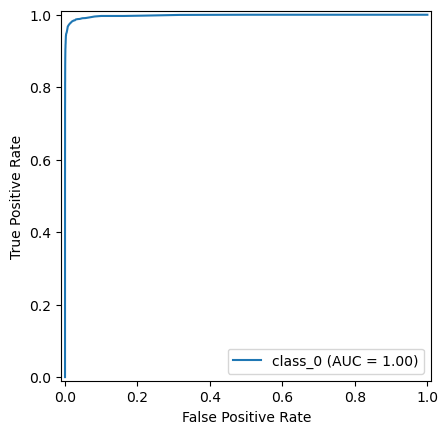

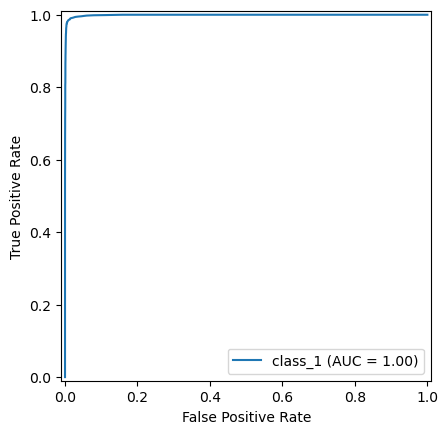

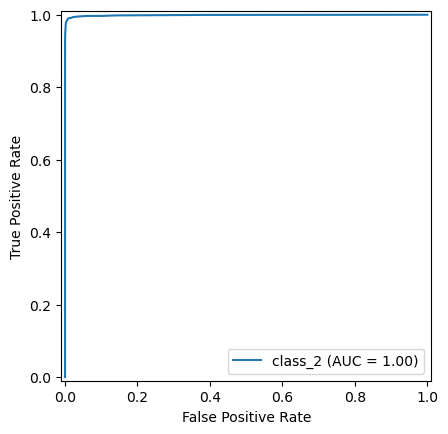

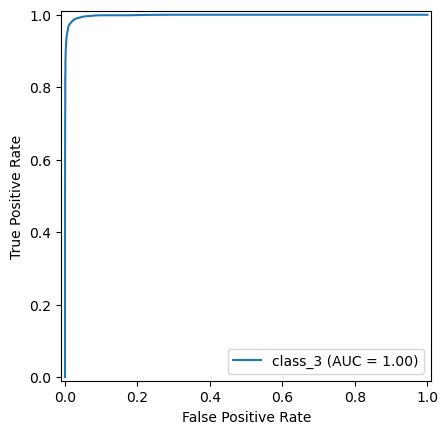

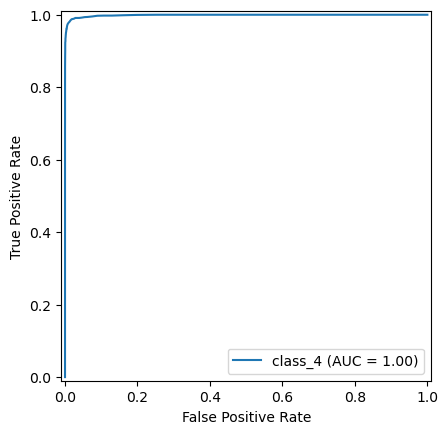

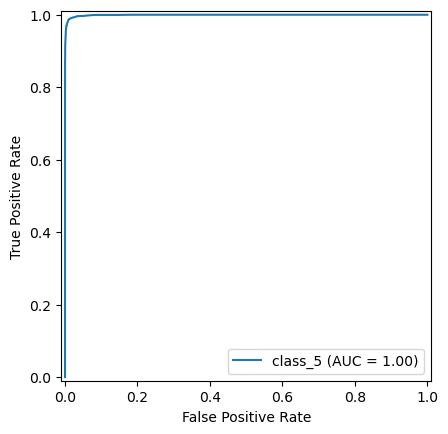

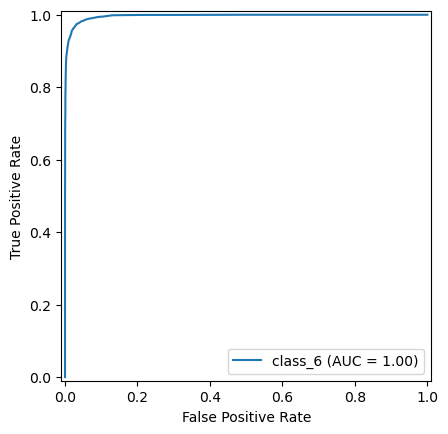

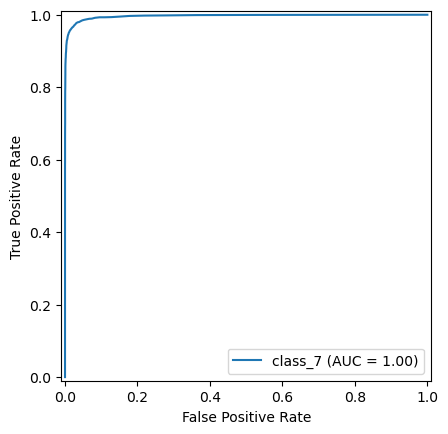

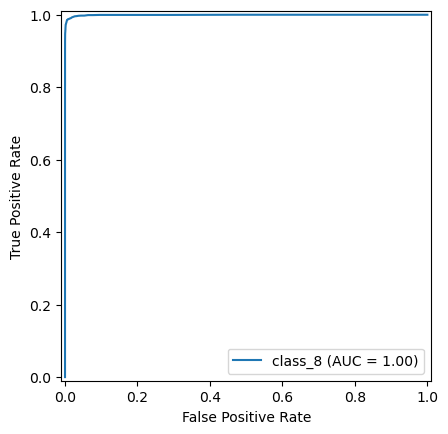

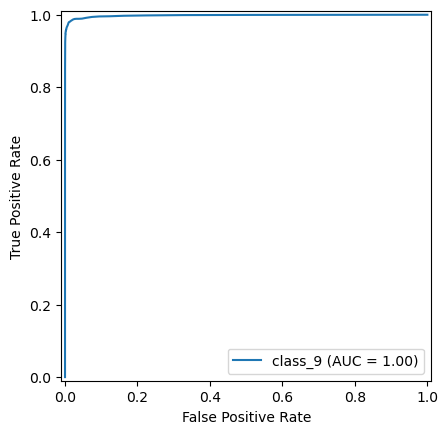

In [40]:
# Plot ROC curves for each class
plt.figure(figsize=(8, 6));  # Set the figure size

for i in range(len(fpr)):  # Iterate over each class
    display = RocCurveDisplay(fpr=fpr[i], tpr=tpr[i], roc_auc=auc[i], estimator_name=f'class_{i}');
    display.plot();  # Plot the ROC curve


plt.show();


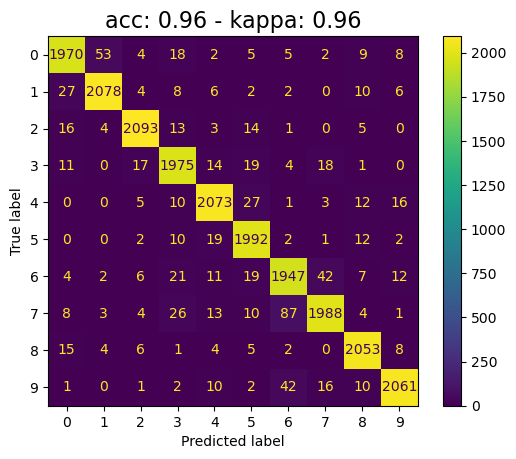

In [41]:
display = ConfusionMatrixDisplay(conf_matrix)
display.plot()

# Set the title for the confusion matrix
plt.title(f'acc: {accuracy:.2f} - kappa: {kappa:.2f}', fontsize=16)

# Show the plot
plt.show()

In [44]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_features': [3, 5, 7],
};

# Initialize the RandomForestClassifier model
model = RandomForestClassifier();

# Perform GridSearchCV to find the best parameters
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy');
grid_search.fit(data_x_train, data_y_train);

# Get the best model
best_model = grid_search.best_estimator_;

# Make predictions on the test data
pred = best_model.predict(data_x_test);

# Get the true values (data_y_test)
true = data_y_test;

# Now, you have the predictions (pred) and true values (true)
# You can calculate accuracy, confusion matrix, etc.
data_grid_accuracy = accuracy_score(true, pred);
data_grid_matrix = confusion_matrix(true, pred);

# Optionally, print the results
print(f"Accuracy: {data_grid_accuracy}");
print(f"Confusion Matrix:\n{data_grid_matrix}");


Accuracy: 0.9582858769931663
Confusion Matrix:
[[1967   61    5   13    2    0    6    3   12    7]
 [  26 2077    8    5    7    3    0    0    8    9]
 [  25    3 2097   11    1    8    1    0    2    1]
 [  12    0   17 1967   12   30    5   13    3    0]
 [   2    0    6    9 2072   30    1    0   13   14]
 [   0    0    2   10   21 1996    1    0    7    3]
 [   6    0    7   23   11   21 1942   40    7   14]
 [   2    3    8   27   12   11  113 1963    3    2]
 [  15    3    9    2    5    2    1    0 2055    6]
 [   3    0    0    3   11    5   39   17   10 2057]]


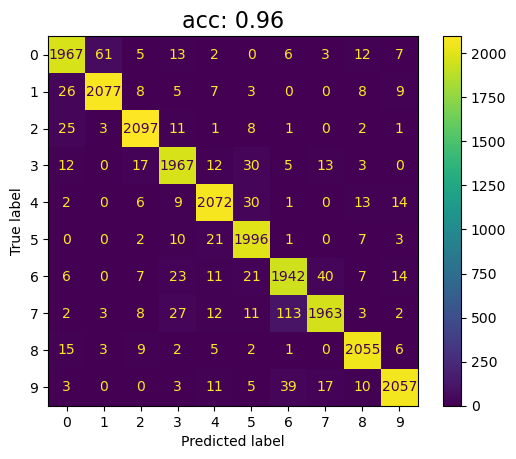

In [46]:
display = ConfusionMatrixDisplay(confusion_matrix=data_grid_matrix);
display.plot();

plt.title(f'acc: {data_grid_accuracy:.2f}', fontsize=16);
plt.show();
